In [93]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from pandas import DataFrame 

In [94]:
# Requesting  Siw Initial Water Saturation  and Sor Residual Oil Saturation input
Siw_str = input('Enter the initial water saturation')  #default=.363
Sor_str = input('Enter the residual oil saturation')   #default=.205

# Converting to Float
Siw = float(Siw_str)
Sor = float(Sor_str)

Enter the initial water saturation.363
Enter the residual oil saturation.205


In [95]:
# requesting input for No of Sw's for fw v/s Sw plot, the Sw grid resolution
no_of_sats_str = input("Enter the number of saturations you want to plot")  #default =10000 for higher accuracy

#convert to integer
no_of_sats = int(no_of_sats_str)



Enter the number of saturations you want to plot10000


In [96]:
#initializaing Swd array 
Swd = np.empty([no_of_sats])

#initializaing Sw array 
Sw = np.empty([no_of_sats])

#Initializing kro
kro = np.empty([no_of_sats])

#Initializing krw
krw = np.empty([no_of_sats])

#Initializing krw
fw = np.empty([no_of_sats])



In [97]:
# requesting input for alphas   
alpha_1_str = input("Please enter the alpha 1") #default 1.0
alpha_2_str = input("Please enter the alpha 2") #deafult .78

# Converting to float
alpha_1 = float(alpha_1_str)
alpha_2 = float(alpha_2_str)



Please enter the alpha 11
Please enter the alpha 2.78


In [98]:
# requesting input for alphas
m_str = input("Please enter the m") #default=2.56
n_str = input("Please enter the n") #deafult= 3.72

# Converting to float
m = float(m_str)
n = float(n_str)




Please enter the m2.56
Please enter the n3.72


In [99]:
# requesting input for oil and water viscoity
mu_oil_str = input("Please enter the viscosity of oil")  #default 2
mu_water_str = input("Please enter the viscosity of water") #default 1

# Converting to Float
mu_oil = float(mu_oil_str)
mu_water = float(mu_water_str)


Please enter the viscosity of oil2
Please enter the viscosity of water1


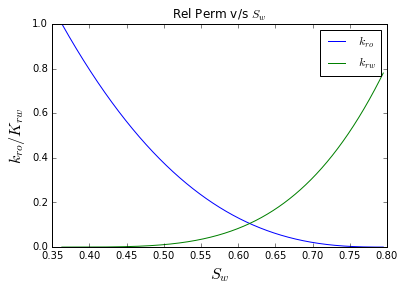

In [100]:

#Calculating fw and Sw array
for i in range(no_of_sats):
    Sw[0] = Siw    # Setting Siw as initial value of Sw
    increment_Sw = (1-Siw-Sor)/no_of_sats #Increment in Sw for plot
    Swd[i] = (Sw[i]-Siw)/(1-Sor-Siw)   # equation 3.111
    kro[i] = alpha_1*(1-Swd[i])**m   # equation 3.109 
    krw[i] = alpha_2*Swd[i]**n # equation 3.110
    fw[i]= 1/( 1 + (kro[i]*mu_water)/(krw[i]*mu_oil)) 
    if i < no_of_sats - 1 :
        Sw[i+1] = Sw[i] + increment_Sw

        
        
plt.plot(Sw,kro, label='$k_{ro}$')
plt_krw = plt.plot(Sw,krw,label='$k_{rw}$')
plt.ylabel('$k_{ro}/K_{rw}$',fontsize = 16)
plt.xlabel('$S_w$',fontsize = 16)
plt.title('Rel Perm v/s $S_w$')
plt.legend()

       

The water front saturations is =  0.6638448
The slope of tangent line is = 2.97727434781


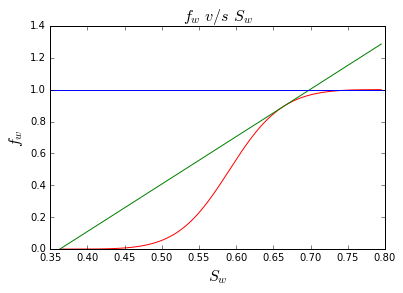

In [101]:


# Generate a plot of fw v/s Sw
fw_versus_Sw = plt.plot(Sw,fw,'r')
plt.xlabel('$S_w$',fontsize = 16)
plt.ylabel('$f_w$',fontsize = 16)
plt.title('$f_w$ $v/s$ $S_w$',fontsize = 16)

# calculating f'w
fw_dash = np.diff(fw)/np.diff(Sw)
b=[0]
# adding one element to make no of fw_dash= no_of_Sats
fw_dash = np.concatenate((fw_dash,b))

#initalizing slope of line array
slope_of_line = np.empty([no_of_sats])
len(slope_of_line)

#initializing y coordinate of line
y=np.empty([no_of_sats])

# calculating slope of line 
for i in range(no_of_sats):
    slope_of_line[i] = (fw[i]-fw[0])/(Sw[i]-Sw[0])

# criteria for matching the slope    
for i in range(len(fw_dash)-1,0,-1):
    if((slope_of_line[i] - fw_dash[i]) <= .0001):
        Swf = Sw[i]
        no_of_Swf = i
        print('The water front saturations is = ',Swf)
        m_line = slope_of_line[i]
        print('The slope of tangent line is =', slope_of_line[i])
        break
        
#calculating Sw_bar from interesction of tangent to fw and y=1
for i in range(no_of_sats):
    y[i] = m_line*Sw[i] - Siw*m_line

Sw_bar= (1 + (Siw*m_line))/m_line
Sw_bar

plt.plot(Sw,y,'g')
plt.axhline(y=1,)

In [102]:

dframe=pd.read_csv('streamtube.csv')
dframe.convert_objects(convert_numeric=True)

# for cell count in stream tube
cell_count = dframe.Cell_No.size

please enter the total no. of cell is streamtube41


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Cell_No,Xi,A,V_j,ratio_Vj_VT,G_J
0,0,0.50,0.12,0.00,0.000,0.00
1,1,52.78,12.90,340.31,0.030,19.07
2,2,74.64,18.24,680.62,0.050,1.42
3,3,91.41,22.34,1020.93,0.080,0.83
4,4,105.55,25.79,1361.24,0.100,0.59
5,5,118.01,28.84,1701.56,0.130,0.46
6,6,129.27,31.59,2041.87,0.150,0.37
7,7,139.63,34.12,2382.18,0.180,0.32
8,8,149.27,36.48,2722.49,0.200,0.27
9,9,158.33,38.69,3062.80,0.230,0.24


In [103]:
#dframe output chec
dframe


,Cell_No,Xi,A,V_j,ratio_Vj_VT,G_J
0,0,0.50,0.12,0.00,0.000,0.00
1,1,52.78,12.90,340.31,0.030,19.07
2,2,74.64,18.24,680.62,0.050,1.42
3,3,91.41,22.34,1020.93,0.080,0.83
4,4,105.55,25.79,1361.24,0.100,0.59
5,5,118.01,28.84,1701.56,0.130,0.46
6,6,129.27,31.59,2041.87,0.150,0.37
7,7,139.63,34.12,2382.18,0.180,0.32
8,8,149.27,36.48,2722.49,0.200,0.27
9,9,158.33,38.69,3062.80,0.230,0.24


In [104]:
dframe.Xi

0       0.50
1      52.78
2      74.64
3      91.41
4     105.55
5     118.01
6     129.27
7     139.63
8     149.27
9     158.33
10    166.89
11    175.04
12    182.82
13    190.29
14    197.47
15    204.40
16    211.10
17    217.60
18    223.91
19    230.04
20    236.02
21    242.00
22    248.13
23    254.44
24    260.94
25    267.64
26    274.57
27    281.75
28    289.22
29    297.00
30    305.15
31    313.71
32    322.77
33    332.41
34    342.77
35    354.03
36    366.49
37    380.63
38    397.40
39    419.26
40    471.54
Name: Xi, dtype: float64

In [112]:
# ask for Qi

#then calculate f'sw from equation 4.39
f_prime_sw = (dframe.ratio_Vj_VT)/.30 #Qi
f_prime_sw

0     0.000000
1     0.100000
2     0.166667
3     0.266667
4     0.333333
5     0.433333
6     0.500000
7     0.600000
8     0.666667
9     0.766667
10    0.833333
11    0.916667
12    1.000000
13    1.100000
14    1.166667
15    1.266667
16    1.333333
17    1.433333
18    1.500000
19    1.600000
20    1.666667
21    1.766667
22    1.833333
23    1.933333
24    2.000000
25    2.100000
26    2.166667
27    2.266667
28    2.333333
29    2.433333
30    2.500000
31    2.600000
32    2.666667
33    2.766667
34    2.833333
35    2.933333
36    3.000000
37    3.100000
38    3.166667
39    3.266667
40    3.333333
Name: ratio_Vj_VT, dtype: float64

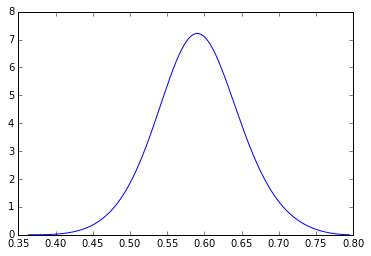

In [106]:
plt.plot(Sw,fw_dash)


In [120]:
#finding Sw corresponding to fprime_sw or fw_dash to variables created 

# have to use some index to do this for every stream tube cell 
for j in range(cell_count):
    for i in range(no_of_sats):
        if (abs(fw_dash[i]-f_prime_sw[j]) <= .001):
            if((Sw[i])>Swf):
                Sw_j[j]=Sw[i]
                print(Sw_j[j])
                
                # then calculate S[w] for each J
     
    
      
            

0.79284
0.7928832
0.7929264
0.7929696
0.7930128
0.793056
0.7930992
0.7931424
0.7931856
0.7932288
0.793272
0.7933152
0.7933584
0.7934016
0.7934448
0.793488
0.7935312
0.7935744
0.7936176
0.7936608
0.793704
0.7937472
0.7937904
0.7938336
0.7938768
0.79392
0.7939632
0.7940064
0.7940496
0.7940928
0.794136
0.7941792
0.7942224
0.7942656
0.7943088
0.794352
0.7943952
0.7944384
0.7944816
0.7945248
0.794568
0.7946112
0.7946544
0.7946976
0.7947408
0.794784
0.7948272
0.7948704
0.7949136
0.7949568
0.762384
0.7624272
0.7624704
0.7625136
0.7625568
0.7626
0.7626432
0.753096
0.7531392
0.7531824
0.7532256
0.7532688
0.753312
0.7429872
0.7430304
0.7430736
0.7431168
0.7376304
0.7376736
0.7377168
0.730848
0.7308912
0.7309344
0.7269168
0.72696
0.7270032
0.7217328
0.721776
0.7186224
0.7186656
0.7143456
0.7143888
0.7117536
0.7086864
0.7087296
0.7058352
0.7058784
0.7026384
0.7006512
0.6977568
0.6978
0.6959424
0.6959856
0.6933504
0.6933936
0.6917088
0.6893328
0.6877776
0.6855744
0.6841488
0.6820752
0.680736
0.6787

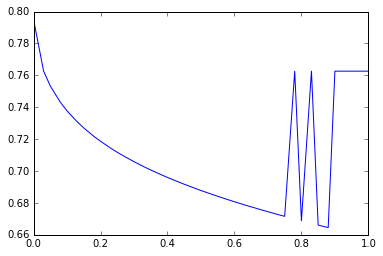

In [130]:
plt.plot(dframe.ratio_Vj_VT,Sw_j)



In [ ]:
fw_dash.dtype
fw_dash


In [ ]:
#initializing Apparent Viscosity Array
vis_ap =np.empty(no_of_sats)

In [ ]:
#apparent viscosity for Sw<Swf
vis_ap_ro = 1/((kro[0]/mu_oil))
print(vis_ap_ro)

#apparent viscosity for 1-Sor>Sw>Swf    
for i in range(no_of_Swf,no_of_sats):
    vis_ap[i] = 1/((kro[i]/mu_oil) + (krw[i]/mu_water))


In [ ]:
# apparent viscosity calcualtion for breakthrough Swf using trapezoidal method
# -ve sign is to compensate for limits of intergration from  f'sw2(swf in this case for breakthrough) to zero instead of zero to
# f'sw2
-np.trapz(vis_ap[no_of_Swf:],fw_dash[no_of_Swf:])/fw_dash[no_of_Swf]


#use this to calculate q@breakthrough from equation 3.125

In [ ]:
plt.plot(fw_dash[no_of_Swf:],vis_ap[no_of_Swf:])
plt.xlabel("$f'_{Sw}$",fontsize=16)
plt.ylabel(r"$\lambda$$^{-1}$",fontsize=16)
plt.title(r"$\lambda$$^{-1}$ $v/s$ $f'_{Sw}$" ,fontsize=16)


In [ ]:
#initializing Q_inj, Apparent Viscoisty and Sw2 Arrays
Q_inj=np.empty(no_of_sats)
apvis=np.empty(no_of_sats)
Sw2=np.empty(no_of_sats)



In [ ]:
#calculating apvis for various all Sw>Swf
for i in range(no_of_Swf+1,no_of_sats):
    Sw2[i]=Sw[i]
    Q_inj[i]=1/fw_dash[i]
    apvis[i]=-np.trapz(vis_ap[i:],fw_dash[i:])/fw_dash[i]

In [ ]:
#creating a dataframe of f'sw , apvis, Sw2, Q_inj
d = {"f'sw":fw_dash[no_of_Swf+1:], 'Apvis':apvis[no_of_Swf+1:],'Q_inj': Q_inj[no_of_Swf+1:]}
df = pd.DataFrame(data=d,index = Sw2[no_of_Swf+1:])
df.index.name = 'Sw2'

In [ ]:
#increasing display of maximum no of rows displayed in Dataframe
pd.set_option('display.max_rows', 2000)
df

In [ ]:
#just a check
plt.plot(Sw2[no_of_Swf+1:],apvis[no_of_Swf+1:])